In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient flow method minimizing energy

In [1]:
# var - variation of the energy functional
# e_dens - energy density
# f_init - initial field
# xmin, xmax - range of x
# h - grid spacing
# t - time step
# N - number of iterations

def gradient_flow(var, e_dens, f_init, xmin, xmax, fmin, fmax, h, t, N):
    x = np.arange(xmin,xmax+h,h)
    f = np.zeros(x.shape)
    df = np.zeros(x.shape)
    ddf = np.zeros(x.shape)
    h2 = h*h
    f[1:-1] = f_init(x)[1:-1]
    f[0] = fmin
    f[-1] = fmax
    
    for n in range(N):
        f[0] = fmin
        f[-1] = fmax
        
        df[0] = (-3*f[0] + 4*f[1] - f[2])/(2*h)
        df[-1] = (3*f[-1] - 4*f[-2] + f[-3])/(2*h)
        df[1:-1] = (f[2:] - f[:-2])/(2*h)
        
        ddf[0] = (f[2] - 2*f[1] + f[0])/h2
        ddf[-1] = (f[-3] - 2*f[-2] + f[-1])/h2
        ddf[1:-1] = (f[2:] - 2*f[1:-1] + f[:-2])/h2
        
        var(f, df, ddf, x)[0] = 0
        var(f, df, ddf, x)[-1] = 0
        f[1:-1] = f[1:-1] - t*var(f, df, ddf, x)[1:-1]
 
    total_energy = sum(e_dens(f, df, x))*h
    return x, f, e_dens(f, df, x), total_energy

# Kink in $\Phi^4$

In [3]:
x, f, e, E = gradient_flow(lambda f, df, ddf, x: -ddf-2*f*(1-f*f), lambda f, df, x: (df**2 + (1-f**2)**2)/2, lambda x: x/5, -5, 5, -1, 1, 0.1, 0.001, 100000)

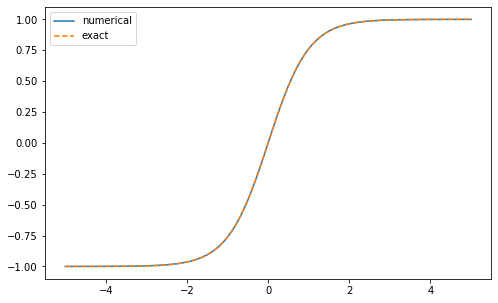

In [4]:
# comparision of a kink profile between numerical and exact solutions 
plt.figure(figsize=(8,5))
plt.plot(x, f, label='numerical')
plt.plot(x, np.tanh(x), '--', label='exact')
plt.legend()

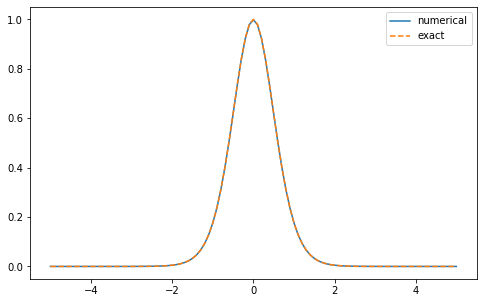

In [5]:
# comparision of an energy density between numerical and exact solutions
plt.figure(figsize=(8,5))
plt.plot(x, e, label='numerical')
plt.plot(x, np.cosh(x)**(-4), '--', label='exact')
plt.legend()

In [6]:
# total energy should be equal to 4/3
E, E-4/3

(1.3315553293065197, -0.0017780040268136066)

# Profile function for the hedgehog solution in the Skyrme model

In [22]:
x, f, e, E = gradient_flow(lambda f, df, ddf, x: -2*((x**2 + 2*np.sin(f)**2)*ddf + 2*x*df + np.sin(2*f)*(df**2 - 1 - np.sin(f)**2/(x**2)))/(3*np.pi), lambda f, df, x: (x**2*df**2 + 2*np.sin(f)**2*(1 + df**2) + np.sin(f)**4/(x**2))/(3*np.pi), lambda x: -(x-15)*np.pi/15, 0.00001, 15, np.pi, 0, 0.1, 0.000001, 20000000)

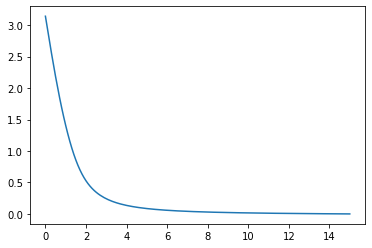

In [23]:
plt.plot(x, f)

In [24]:
E

1.2321315784540632